In [1]:
import datetime as dt
import subprocess
import numpy as np
import os
import placesEvie as places
import glob
import time
import sys
import arrow
import gsw

In [5]:
# # load one of the netcdf files. You will need to replace the path below with the path to the file on your system. 
# # If the file is in the same directory as your notebook, you should be able to load using only the name of the file:
# # f1=nc.Dataset('ts_prodHC201812_2015_CortesMarina.nc')
# f=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/calcFiles/prodForEvie/filesForEvie/ts_prodHC201812_2015_CortesMarina.nc')


In [12]:
places.PLACES['Cortes/Marina']['NEMO grid ji']

(732, 157)

In [14]:
plcnames = ['Cortes/Marina','Deep Bay','Fanny Bay','Lasqueti Island','Lund/Desolation Sound',\
           'Main SoG','Maple Bay','Mouth of Okeover','Nanoose Bay','Northern Baynes',\
           'Salt Spring','Southern Baynes']




{'Cortes/Marina': {'NEMO grid ji': (732, 157),
  'lon lat': (-125.0194, 50.0418)},
 'Deep Bay': {'NEMO grid ji': (599, 126), 'lon lat': (-124.7392, 49.4606)},
 'Fanny Bay': {'NEMO grid ji': (614, 120), 'lon lat': (-124.8227, 49.5086)},
 'Lasqueti Island': {'NEMO grid ji': (586, 195),
  'lon lat': (-124.3384, 49.5442)},
 'Lund/Desolation Sound': {'NEMO grid ji': (702, 187),
  'lon lat': (-124.7666, 49.9804)},
 'Main SoG': {'NEMO grid ji': (450, 253), 'lon lat': (-123.5832, 49.1177)},
 'Maple Bay': {'NEMO grid ji': (392, 213), 'lon lat': (-123.5947, 48.814)},
 'Mouth of Okeover': {'NEMO grid ji': (726, 192),
  'lon lat': (-124.8174, 50.0805)},
 'Nanoose Bay': {'NEMO grid ji': (517, 190), 'lon lat': (-124.1359, 49.2609)},
 'Northern Baynes': {'NEMO grid ji': (646, 127),
  'lon lat': (-124.8924, 49.6492)},
 'Salt Spring': {'NEMO grid ji': (386, 218), 'lon lat': (-123.5513, 48.7993)},
 'Southern Baynes': {'NEMO grid ji': (602, 127),
  'lon lat': (-124.7457, 49.476)}}

In [19]:
start = '2015-01-01'
end = '2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)
arrow_array = []
date_array = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

#print('days: '+str(len(arrow_array)))
dayslen = len(arrow_array)

for i in range(0,dayslen):
    tdate = arrow_array[i][0]
    ddmmmyy = tdate.format('YYYYMMDD').lower()
    date_array.append(ddmmmyy)
    
    

157


In [69]:
import datetime as dt
import subprocess
import numpy as np
import os
import placesEvie as places
import glob
import time
import sys
import arrow

start = '2015-01-01'
end = '2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)
arrow_array = []
date_array = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)

#print('days: '+str(len(arrow_array)))
dayslen = len(arrow_array)

for i in range(0,dayslen):
    tdate = arrow_array[i][0]
    ddmmmyy = tdate.format('YYYYMMDD').lower()
    date_array.append(ddmmmyy)

plcnames = ['Cortes/Marina','Deep Bay','Fanny Bay','Lasqueti Island','Lund/Desolation Sound',\
           'Main SoG','Maple Bay','Mouth of Okeover','Nanoose Bay','Northern Baynes',\
           'Salt Spring','Southern Baynes']

plcnamesf = ['CortesMarina','DeepBay','FannyBay','LasquetiIsland','LundDesolation Sound',\
           'MainSoG','MapleBay','MouthofOkeover','NanooseBay','NorthernBaynes',\
           'SaltSpring','SouthernBaynes']


for p in range(0,len(plcnames)):
    
    tplc = plcnames[p]
    tplcf = plcnamesf[p]
    print(tplc)
    
    ji = places.PLACES[tplc]['NEMO grid ji']
    tj = ji[0]
    ti = ji[1]

    TA_stor = np.zeros([365,40])
    DIC_stor = np.zeros([365,40])
    SAL_stor = np.zeros([365,40])
    TEMP_stor = np.zeros([365,40])

    for i in range(0,len(date_array)):
        ymd = date_array[i]
        if i % 50 == 0:
            print(i)
        sdir = '/data/tjarniko/results/BR_1st_2015/ncs/'
        carp = sdir + '/SKOG_1d_*'+ 'carp_T_' + ymd + '-' + ymd + '.nc'
        grid = sdir + '/SKOG_1d_*'+ 'grid_T_' + ymd + '-' + ymd + '.nc'
        tcarp = glob.glob(carp)
        tgrid = glob.glob(grid)
        carpnc = nc.Dataset(tcarp[0])
        gridnc = nc.Dataset(tgrid[0])
        TA = carpnc.variables['total_alkalinity']
        DIC = carpnc.variables['dissolved_inorganic_carbon']
        TEMP = gridnc.variables['votemper']
        SAL = gridnc.variables['vosaline']

        loc_ta = (TA[0,:,tj,ti])
        loc_dic = (DIC[0,:,tj,ti])
        loc_temp = TEMP[0,:,tj,ti]
        loc_sal = SAL[0,:,tj,ti]

        TA_stor[i,:] = loc_ta
        DIC_stor[i,:] = loc_dic
        TEMP_stor[i,:] = loc_temp
        SAL_stor[i,:] = loc_sal

    ncname = tplcf + '_2015TS.nc'
    f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
    g = f.createGroup('model_output')
    #g.createDimension('days', len(NO3_mod))
    g.createDimension('days', 365)
    g.createDimension('depths', 40)
    ts = g.createVariable('local_TA','f4',('days','depths'))
    ts[:] = TA_stor
    ts2 = g.createVariable('local_DIC','f4',('days','depths'))
    ts2[:] = DIC_stor
    ts3 = g.createVariable('local_TEMP','f4',('days','depths'))
    ts3[:] = TEMP_stor
    ts4 = g.createVariable('local_SAL','f4',('days','depths'))
    ts4[:] = SAL_stor
    f.close()

Cortes/Marina
0
Deep Bay
0
Fanny Bay
0
Lasqueti Island
0
Lund/Desolation Sound
0
Main SoG
0
Maple Bay
0
Mouth of Okeover
0
Nanoose Bay
0
Northern Baynes
0
Salt Spring
0
Southern Baynes
0


In [62]:
w = nc.Dataset('Cortes_2015TS.nc')
t = w['model_output']['mod_point'][:]
print(t[0,:])

[  1.00000002e+20   1.00000002e+20   1.00000002e+20   1.00000002e+20
   1.00000002e+20   1.00000002e+20   1.00000002e+20   1.00000002e+20
   1.00000002e+20   1.00000002e+20   1.00000002e+20   1.00000002e+20
   1.00000002e+20   1.00000002e+20   1.00000002e+20   1.00000002e+20
   1.00000002e+20   1.00000002e+20   1.00000002e+20   1.00000002e+20
   1.00000002e+20   1.00000002e+20   1.00000002e+20   1.00000002e+20
   1.00000002e+20   1.00000002e+20   1.00000002e+20   1.00000002e+20
   1.00000002e+20   1.00000002e+20   1.00000002e+20   1.00000002e+20
   1.00000002e+20   1.00000002e+20   1.00000002e+20   1.00000002e+20
   1.00000002e+20   1.00000002e+20   1.00000002e+20   1.00000002e+20]


In [38]:

TA_stor = np.zeros([365,40,1,1])
w = nc.Dataset(tnc_sens[0])


In [31]:
f=nc.Dataset('/data/eolson/results/MEOPAR/SS36runs/calcFiles/prodForEvie/filesForEvie/ts_prodHC201812_2015_CortesMarina.nc')
print(f)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1h_20150101_20150110
    description: smelt diagnostics A
    title: smelt diagnostics A
    Conventions: CF-1.6
    timeStamp: 2018-Dec-27 15:30:25 GMT
    uuid: d2d18be9-7e6b-4445-be1c-6c9293dc4db2
    history: Fri Mar  1 16:56:41 2019: ncrcat /data/eolson/MEOPAR/SS36runs/calcFiles/prodForEvie/temp/ts_prodHC201812_2015_CortesMarina_0.nc /data/eolson/MEOPAR/SS36runs/calcFiles/prodForEvie/temp/ts_prodHC201812_2015_CortesMarina_1.nc /data/eolson/MEOPAR/SS36runs/calcFiles/prodForEvie/temp/ts_prodHC201812_2015_CortesMarina_2.nc /data/eolson/MEOPAR/SS36runs/calcFiles/prodForEvie/temp/ts_prodHC201812_2015_CortesMarina_3.nc /data/eolson/MEOPAR/SS36runs/calcFiles/prodForEvie/temp/ts_prodHC201812_2015_CortesMarina_4.nc /data/eolson/MEOPAR/SS36runs/calcFiles/prodForEvie/temp/ts_prodHC201812_2015_CortesMarina_5.nc /data/eolson/MEOPAR/SS36runs/calcFiles/prodForEvie/temp/ts_prodHC201812_2015_C

In [70]:
def oned_moxy(tsal, ttemp, tdic, tta, pres_atm, depth_this):
    
#     tsal = grid.variables['vosaline'][0,0,:,:]
#     ttemp = grid.variables['votemper'][0,0,:,:]
#     tdic = carp.variables['dissolved_inorganic_carbon'][0,0,:,:]
#     tta = carp.variables['total_alkalinity'][0,0,:,:]

    size_box = np.shape(tdic)
    size_0 = size_box[0]
    size_1= size_box[1]

    tsra = np.ravel(tsal)
    ttera = np.ravel(ttemp)
    ttara = np.ravel(tta) * 1e-3
    tdra = np.ravel(tdic) * 1e-3
    tzero = np.zeros_like(tsra)
    tpressure = np.zeros_like(tsra)
    tdepth = np.zeros_like(tsra)
    tpressure[:] = pres_atm
    tdepth[:] = depth_this
    tzero = tpressure * 0 
        
    tsra_psu = tsra*35/35.16504
    ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

    response_tup = mocsy.mvars(temp=ttera_is, sal=tsra_psu, alk=ttara, dic=tdra, 
                       sil=tzero, phos=tzero, patm=tpressure, depth=tdepth, lat=tzero, 
                        optcon='mol/m3', optt='Tinsitu', optp='m',
                        optb = 'l10', optk1k2='m10', optkf = 'dg', optgas = 'Pinsitu')
    pH,pco2,fco2,co2,hco3,co3,OmegaA,OmegaC,BetaD,DENis,p,Tis = response_tup

    pHr = pH.reshape(size_0,size_1)
    OmAr = OmegaA.reshape(size_0,size_1)
    pco2r = pco2.reshape(size_0,size_1)
    
    return pHr, OmAr, pco2r

In [72]:
w = nc.Dataset('/data/tjarniko/results/BR_1st_2015/ncs/SKOG_1d_20151127_20151231_ptrc_T_20151231-20151231.nc')

In [77]:
print(w['deptht'][:])

[   0.5000003     1.5000031     2.50001144    3.50003052    4.50007057
    5.50015068    6.50031042    7.50062323    8.50123596    9.50243282
   10.50476551   11.50931168   12.51816654   13.53541183   14.56898212
   15.63428783   16.76117325   18.00713539   19.48178482   21.38997841
   24.10025597   28.22991562   34.68575668   44.51772308   58.48433304
   76.58558655   98.06295776  121.86651611  147.08946228  173.11448669
  199.57304382  226.26029968  253.06663513  279.93453979  306.834198
  333.75018311  360.67453003  387.60321045  414.53408813  441.46609497]


In [78]:
t = nc.Dataset('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/For_Evie/FannyBay_2015TS.nc')

In [85]:
ta = t['model_output']['local_TA']
dic = t['model_output']['local_DIC']

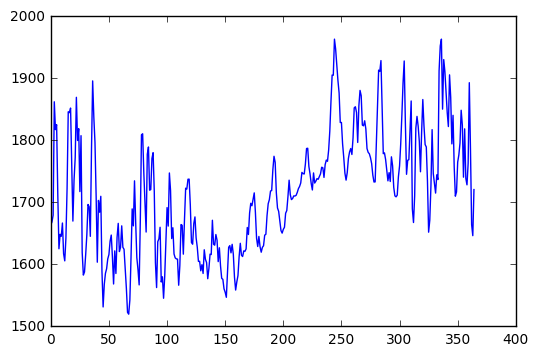

In [86]:
plt.plot(dic[:,0])

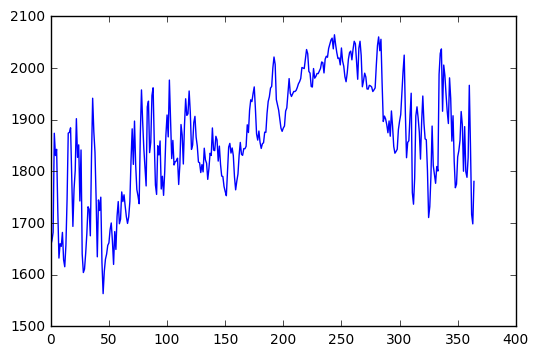

In [87]:
plt.plot(ta[:,0])

In [88]:
plcnamesf = ['CortesMarina','DeepBay','FannyBay','LasquetiIsland','LundDesolation Sound',\
           'MainSoG','MapleBay','MouthofOkeover','NanooseBay','NorthernBaynes',\
           'SaltSpring','SouthernBaynes']

w = nc.Dataset('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/For_Evie/MainSoG_2015TS.nc')

SyntaxError: invalid syntax (<ipython-input-88-3c874bf90070>, line 3)

In [92]:
w = nc.Dataset('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/For_Evie/MainSoG_2015TS.nc')
print(w['model_output']['local_TA'])

<class 'netCDF4._netCDF4.Variable'>
float32 local_TA(days, depths)
path = /model_output
unlimited dimensions: 
current shape = (365, 40)
filling on, default _FillValue of 9.969209968386869e+36 used



In [95]:
TA = w['model_output']['local_TA'][:]
